# Домашнє завдання до лекції 5: візуалізація даних.
В цьому ДЗ ми будемо багато працювати не тільки з візуалізаціями, а і з функціоналом pandas, адже візуалізація даних - це частина аналізу даних та працює спільно з агрегацією та фільтрацією наших даних. До того ж перед тим, як аналізувати дані, їх треба почистити. Чим ми і займемось.  

0.Імпортуйте matplotlib.pyplot, seaborn та pandas.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Набір даних Taxis

Використовуючи метод з бібліотеки `seaborn` `load_dataset` ми завантажимо перший набір даних для аналізу. Завантажимо дані так, бо це зручно + аби ви знали, що є і така можливість знайти собі набір даних для експериментів.  
Набір даних містить поїздки таксі у Нью Йорку у 2019 році. Детальний опис на [сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Які колонки мість набір даних:  
- `pickup` - час початку поїздки  
- `dropoff` - час закінчення поїздки  
- `passengers` - кількість пасажирів у поїздці  
- `distance` - відстань поіздки  
- `fare` - базова плата за поїздку  
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги (за це також платить пасажир)  
- `total` - сумарна плата за поїздку  
- `color` - колір авто, яке здійснювало поїздку  
- `payment` - метод оплати  
- `pickup_zone` - зона, у якій почалась поїздка  
- `dropoff_zone` - зона, у якій закінчилась поїздка  
- `pickup_borough` - район, у якому почалась поїздка  
- `dropoff_borough` - район, у якому закінчилась поїздка  

Назви ознак здбільшого говорять самі за себе. Слово borough перекладається з англійської як "район".

Ми будемо працювати сами з тим шматочком даних, які наявні в seaborn.  
Переглянути всі набори даних з seaborn можна [тут](https://github.com/mwaskom/seaborn-data).

Спершу - завантажуємо дані - просто виконайте клітинку нижче.

In [2]:
df_taxi = sns.load_dataset('taxis')

1.Виведіть 
- перші 3 записи з набору даних
- типи даних в наборі даних df_taxi
- розміри набору даних

In [3]:
display(df_taxi[:3])
display(df_taxi.dtypes)
df_taxi_shape = df_taxi.shape
display(df_taxi_shape)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


pickup              object
dropoff             object
passengers           int64
distance           float64
fare               float64
tip                float64
tolls              float64
total              float64
color               object
payment             object
pickup_zone         object
dropoff_zone        object
pickup_borough      object
dropoff_borough     object
dtype: object

(6433, 14)

Очікуваний результат (можна вивести в окремих клітинках):

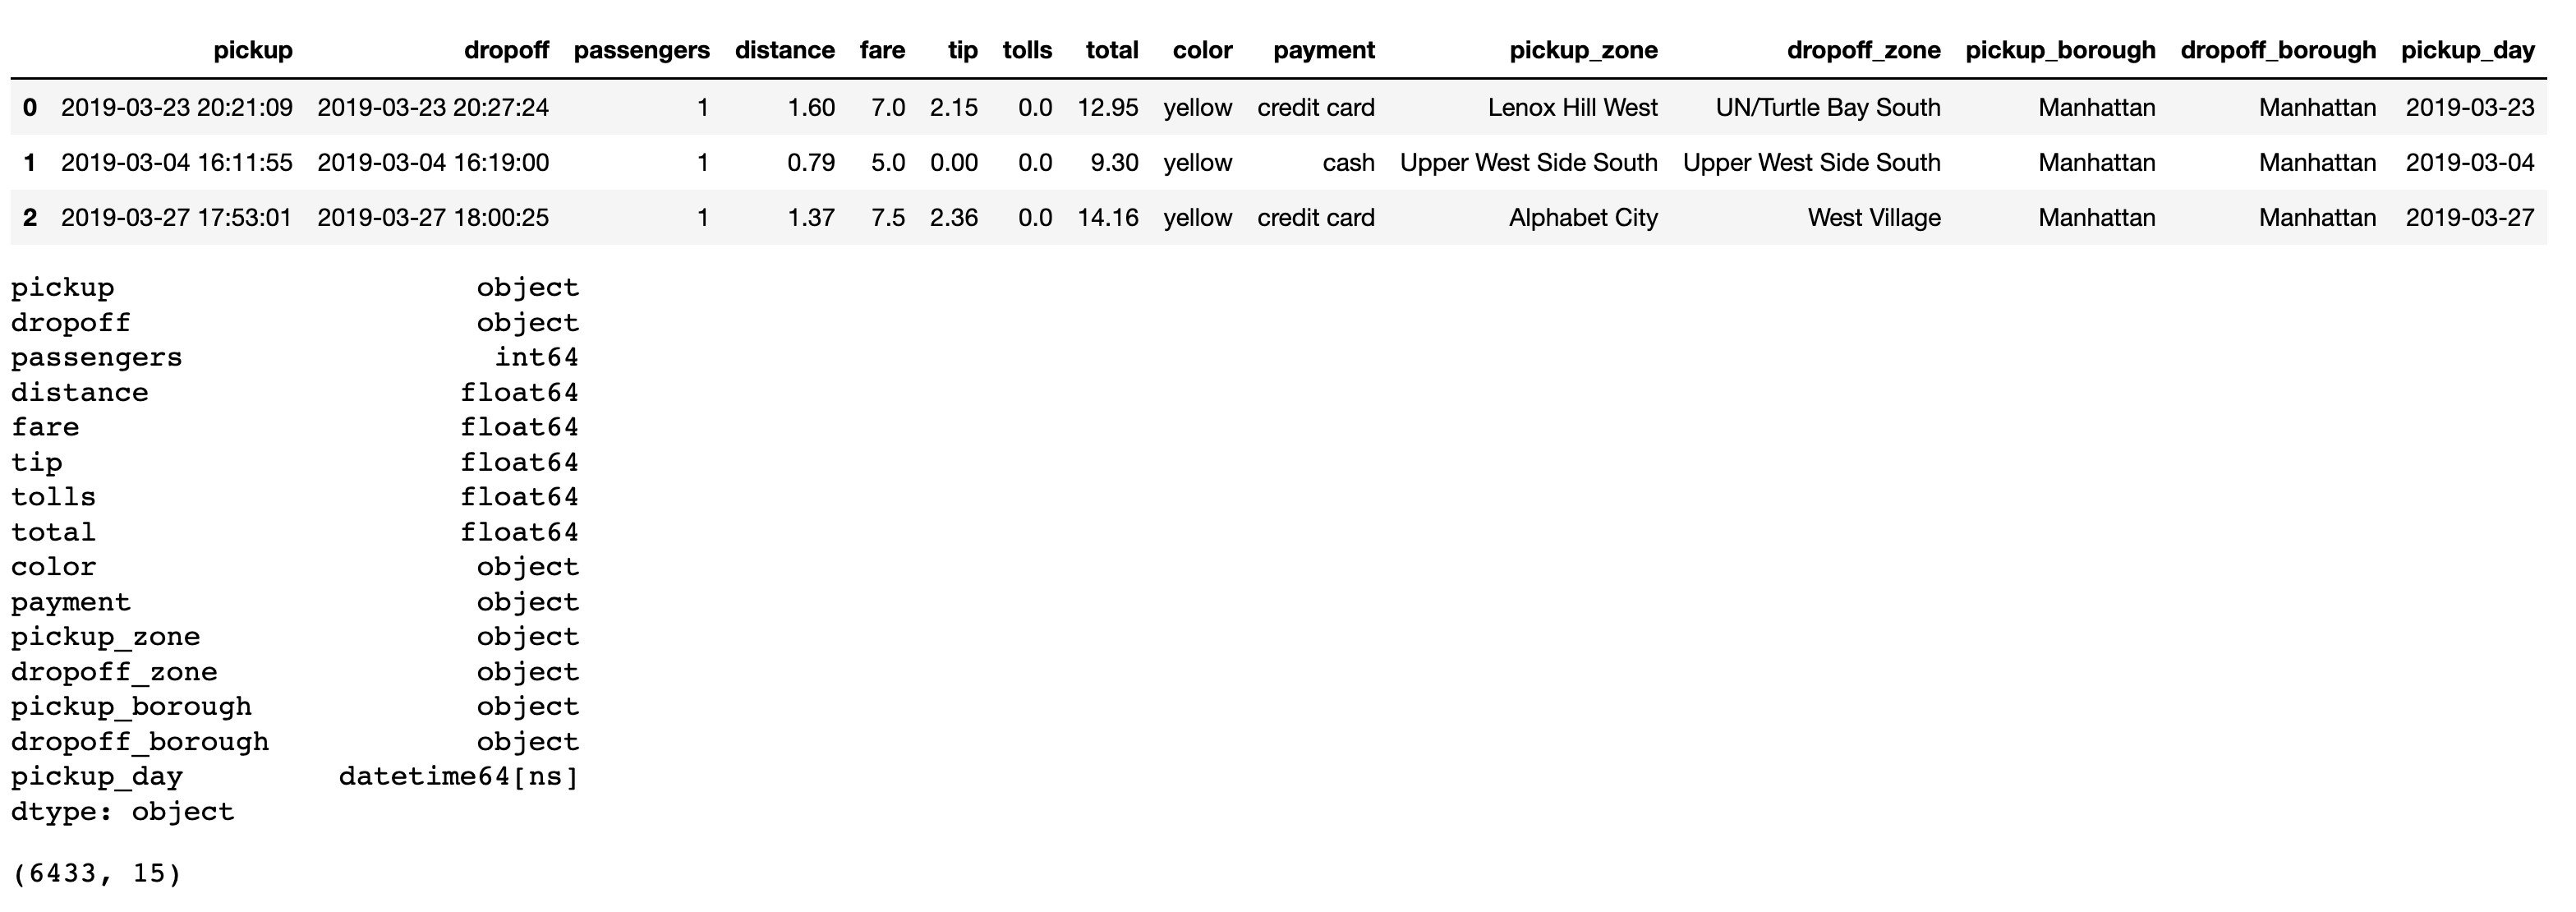

2.Перевіримо, чи є в цьому наборі даних пропущені значення. Для цього можемо вивести кількість пропущених значень в кожній колонці наступним чином (це надзвичайно корисна команда, запамʼятайте її):

In [4]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

Цікаво, чому дані відсутні? Відповідь на це питання нам дасть розуміння, чи можна такі дані видалити, чи можливо їх треба якось заповнити. Виведіть на екран ті рядки, де колонка, яка має найбільше пропущених значень (або одна з тих, що має максимальну кількість пропущених), має пропущені значення. 
Подивіться на результат і напишіть свої думки щодо питань:
- чому на ваш погляд в цих рядках є відстуні дані в кількох колонках? Чому ви так думаєте?
- чому на ваш погляд є рядки з distance==0, а total!=0? Як ви до цього прйишли?
Відповідь просто текстом. Можна використовувати будь-які допоміжні операції над датасетом чи джерела, які допоможуть вам відповісти на ці питання. Якщо щось використовуєте, то це треба зазначити у відповіді.  

Ваша відповідь тут - це 70% виконання цього завдання.

In [5]:
# all NaN values of dataframe
df_taxi_temp5 = df_taxi[df_taxi.isna().any(axis=1)]
#df_taxi_temp5 = df_taxi[df_taxi.isnull().any(axis=1)]   чи є різниця між .isna та .isnull ?
display(df_taxi_temp5[:15:])
f' 1) Маю думки, що відсутні дані про локації початку та закінчення поїздок спричинені відсутністю зв`язку GPS, який і визначав локацію, бо це напевно робиться автоматично. Відсутні дані про тип оплати може бути пов`заний з проблемою платіжних терміналів, і в таких випадках інформація або не збиралася, або був змінений варант оплати на готівку, а система на це не налаштована.'

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.40,8.5,0.00,0.0,11.80,yellow,NaN,Murray Hill,Flatiron,Manhattan,Manhattan
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.0,100.38,yellow,credit card,NaN,NaN,NaN,NaN
445,2019-03-19 06:57:14,2019-03-19 07:00:08,1,1.30,5.5,0.00,0.0,6.30,yellow,NaN,Boerum Hill,Columbia Street,Brooklyn,Brooklyn
491,2019-03-07 07:11:33,2019-03-07 07:11:39,1,1.60,2.5,0.00,0.0,5.80,yellow,NaN,Murray Hill,Murray Hill,Manhattan,Manhattan
545,2019-03-27 11:03:43,2019-03-27 11:14:34,1,4.20,15.0,0.00,0.0,15.80,yellow,NaN,LaGuardia Airport,Forest Hills,Queens,Queens
606,2019-03-19 15:04:40,2019-03-19 15:06:15,1,0.40,3.5,1.35,0.0,8.15,yellow,credit card,NaN,Upper East Side South,NaN,Manhattan
621,2019-03-15 17:16:35,2019-03-15 17:25:01,1,1.30,7.5,0.00,0.0,11.80,yellow,NaN,Upper East Side North,Upper East Side South,Manhattan,Manhattan
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.5,166.00,yellow,credit card,NaN,NaN,NaN,NaN
671,2019-03-09 22:45:46,2019-03-09 22:46:50,1,0.40,3.5,0.00,0.0,7.30,yellow,cash,NaN,Lincoln Square East,NaN,Manhattan
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,1.74,17.0,4.26,0.0,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN


' 1) Маю думки, що відсутні дані про локації початку та закінчення поїздок спричинені відсутністю зв`язку GPS, який і визначав локацію, бо це напевно робиться автоматично. Відсутні дані про тип оплати може бути пов`заний з проблемою платіжних терміналів, і в таких випадках інформація або не збиралася, або був змінений варант оплати на готівку, а система на це не налаштована.'

In [6]:
# distance == 0
df_taxi_temp6 = df_taxi.loc[df_taxi.distance == 0]
display(df_taxi_temp6[:15:])
print('2) Переглянувши дані про поїздки з дальністю 0, бачу що оплати за такі поїздки збиралися + майже усі поїдки починалися та закінчувалися в одній і тій самій зоні + в тих самих районах. \n Роблю припущення з цього - це оплати за виклик та очікування, і такі клієнти нікуди не їхали. \n Або це збій у системі, що малоімовірно.')

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
120,2019-03-21 17:21:44,2019-03-21 17:21:49,1,0.0,2.5,0.00,0.00,4.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.0,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
670,2019-03-08 04:50:48,2019-03-08 04:51:07,1,0.0,2.5,0.00,0.00,6.30,yellow,cash,Lenox Hill East,Lenox Hill East,Manhattan,Manhattan
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.0,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1080,2019-03-04 14:17:05,2019-03-04 14:17:13,1,0.0,2.5,0.00,0.00,3.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
1207,2019-03-08 15:41:20,2019-03-08 15:41:23,1,0.0,2.5,0.00,0.00,5.80,yellow,NaN,Hudson Sq,Hudson Sq,Manhattan,Manhattan
1482,2019-03-10 20:27:25,2019-03-10 20:28:33,1,0.0,52.0,16.59,0.00,71.89,yellow,credit card,Lincoln Square East,Lincoln Square East,Manhattan,Manhattan
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.0,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1910,2019-03-25 14:37:56,2019-03-25 14:38:22,1,0.0,2.5,0.01,0.00,3.31,yellow,credit card,Queensbridge/Ravenswood,Queensbridge/Ravenswood,Queens,Queens


2) Переглянувши дані про поїздки з дальністю 0, бачу що оплати за такі поїздки збиралися + майже усі поїдки починалися та закінчувалися в одній і тій самій зоні + в тих самих районах. 
 Роблю припущення з цього - це оплати за виклик та очікування, і такі клієнти нікуди не їхали. 
 Або це збій у системі, що малоімовірно.


3.Заповнимо пусті значення. Оскільки всі колонки набору даних мають пропущені значення в рядках з типом даних рядок, заповнимо пропущені значення рядком `NA`.
Створіть набір даних `df_taxi_clean`, який містить дані `df_taxi` із заповненими пропущеними значеннями у всіх колонках (де ті значення відсутні) значенням `NA`.

**УВАГА!** Надалі в роботі треба використовувати `df_taxi_clean`, ми ж його і створили для того, аби далі ним користуватись :)

In [7]:
df_taxi_clean = df_taxi
df_taxi_clean.fillna('NA', inplace = True)

Після виконання завдання запустіть наступну клітинку:

In [8]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

Очікуваний результат виконання коду в попердній клітинці:

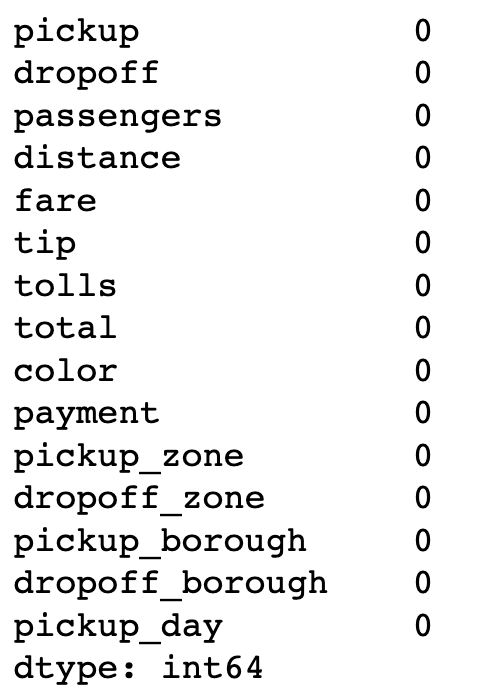

4.Хочеться подивитись на дані у динаміці. Перетворіть колонку `pickup` набору даних `df_taxi_clean` (нам нема чого працювати з "брудними" даними, якщо ми їх вже почистили, але хай будуть в окремій змінній про всяк випадок) у формат `datetime64[ns]`. Результат перетворення збережіть в тій самій колонці `pickup`.

In [9]:
df_taxi_clean.pickup = pd.to_datetime(df_taxi_clean.pickup)

Після виконання завдання запустіть наступну клітинку:

In [10]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

Очікуваний результат виконання коду в попердній клітинці:

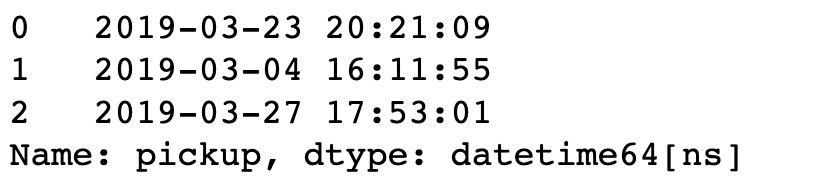

5.У нас колонка pickup зараз мість дані у форматі дата-час. Пропоную прибрати час і зробити аналітику по дням. Для цього виконайте клатинку нижче:

In [11]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

А тепер згрупуйте дані по pickup_day та виведіть графік сумарних платежів по дням. Після виведення графіку скажіть, чи бачите щось дивне на ньому?

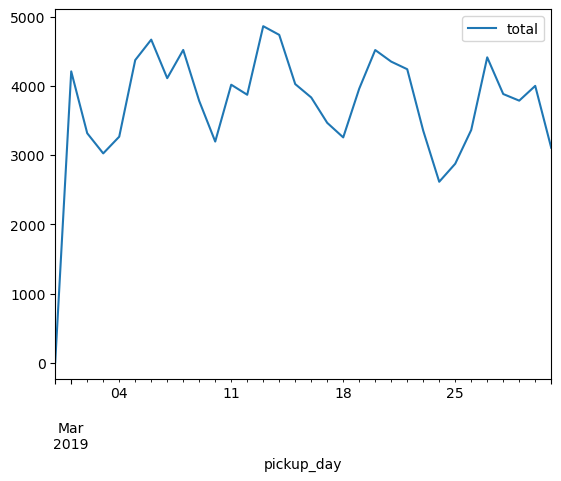

In [12]:
dtc = df_taxi_clean.groupby(['pickup_day'])['total'].sum()
dtc = dtc.to_frame()
dtc.reset_index(inplace=True)
dtc.plot('pickup_day','total');

Очікується графік:

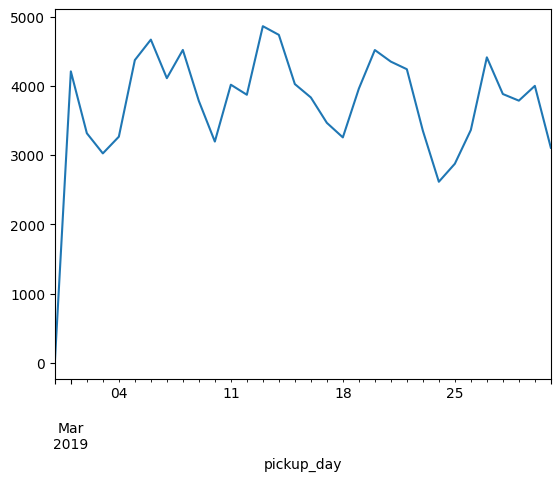

6.Виведіть кількість рядків для кожного pickup_day.

In [13]:
dtc = df_taxi_clean.groupby(['pickup_day'])['total'].count()
dtc

pickup_day
2019-02-28      1
2019-03-01    241
2019-03-02    198
2019-03-03    169
2019-03-04    171
2019-03-05    228
2019-03-06    257
2019-03-07    218
2019-03-08    235
2019-03-09    204
2019-03-10    185
2019-03-11    209
2019-03-12    218
2019-03-13    244
2019-03-14    260
2019-03-15    201
2019-03-16    220
2019-03-17    178
2019-03-18    173
2019-03-19    201
2019-03-20    233
2019-03-21    221
2019-03-22    229
2019-03-23    209
2019-03-24    149
2019-03-25    155
2019-03-26    178
2019-03-27    232
2019-03-28    205
2019-03-29    209
2019-03-30    215
2019-03-31    187
Name: total, dtype: int64

Маєте побачити, що для дати 2019-02-28 є тільки один рядок. Це запис, який, схоже, потрапив сюди випадково, видаліть з набору даних df_taxi_clean рядок, що містить pickup_day рівний 2019-02-28. Та знову виведіть графік сумарних платежів по pickup_day.

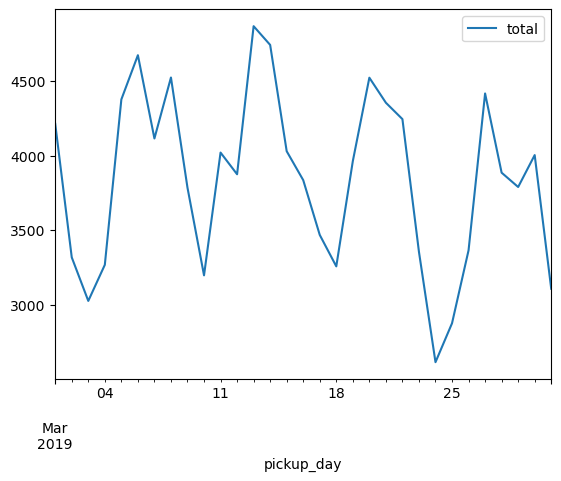

In [14]:
df_taxi_clean.drop(df_taxi_clean.loc[df_taxi_clean['pickup_day'] == '2019-02-28'].index, inplace=True)
dtc = df_taxi_clean.groupby(['pickup_day'])['total'].sum()
dtc = dtc.to_frame()
dtc.reset_index(inplace=True)
dtc.plot('pickup_day','total');

Очікуваний графік:

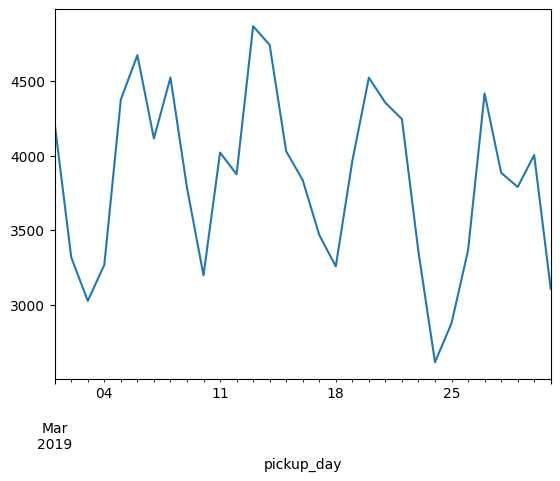

7.Давайте подивимось на динаміку сумарних платежів по районам. Для цього сформуйте на основі `df_taxi_clean` зводну таблицю, де рядками є `pickup_day`, колонками `pickup_borough`, а значенням - сума платежів. Запишіть зводну таблицю в змінну `borough_pivot`. Наостанок, вилучіть колонку зі значенням `pickup_borough` рівним `NA` - уявімо, що ці дані нас не цікавлять.

In [15]:
borough_pivot = df_taxi_clean.pivot_table(index=['pickup_day'], columns=['pickup_borough'], values=['total'], aggfunc='sum')
borough_pivot = borough_pivot.total.drop(columns='NA')

Далі запустіть наступну клітинку та дайте відповідь на питання, в якому районі найчастіше найбільша сума денних платежів за поїздки на таксі?   
До речі, також рекомендую спробувати запустити команду `borough_pivot.plot()` та зрозуміти, навіщо нам тут частина `fillna(0)`.

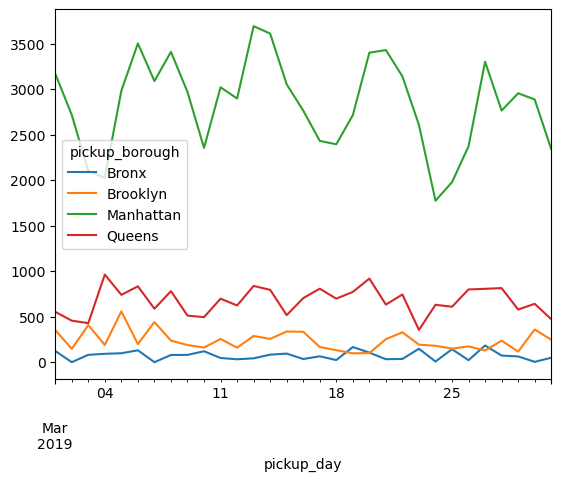

In [16]:
borough_pivot.fillna(0).plot();
#fillna(0) потрібен для того щоб заповнити пропущені дані --> графік буде без переривань для Bronx

Очікуваний графік :

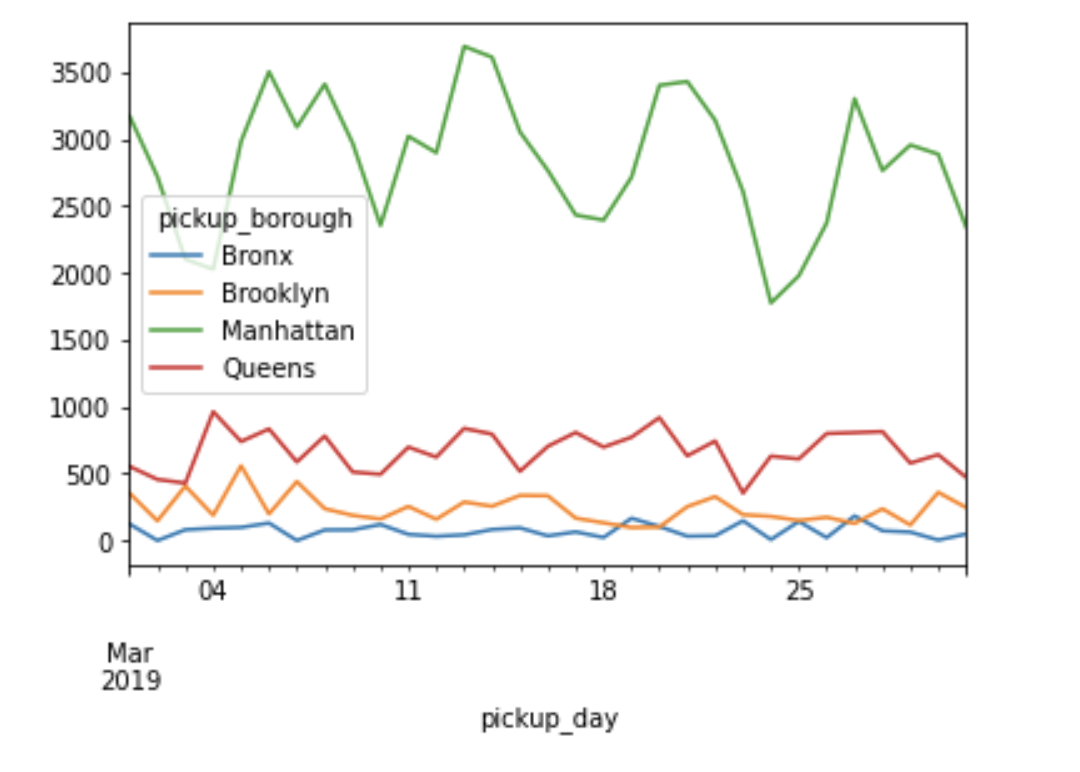

8.Виведіть будь-яким способом гістограми суми денних платежів за поїздки по кожному з районів. Має бути 4 гістограми, на 4ох різних фігурах, або на одній.   
`Підказка:` Найпростіше це буде зробити, використавши `borough_pivot`.  
Пограйтесь з кількістю бінів. Яка кількість бінів на ваш погляд тут є вдалою? Чому?

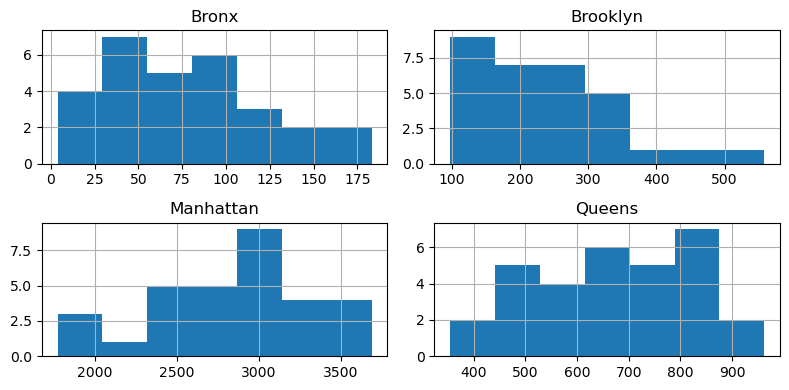

In [17]:
borough_pivot.hist(bins=7, figsize=(8,4))
plt.tight_layout();
# оптимальною кількістю для цих даних є приблизно 5-7 бінів. При збільшенні кількості - більше навантаження, а інформації нової не буде, 
# бо даних у наборі не так багато і ці показники знаходяться в цих межах(не розтягнуті - аутлайнерів мало)

Приклад одного з правильних виконань завдання:

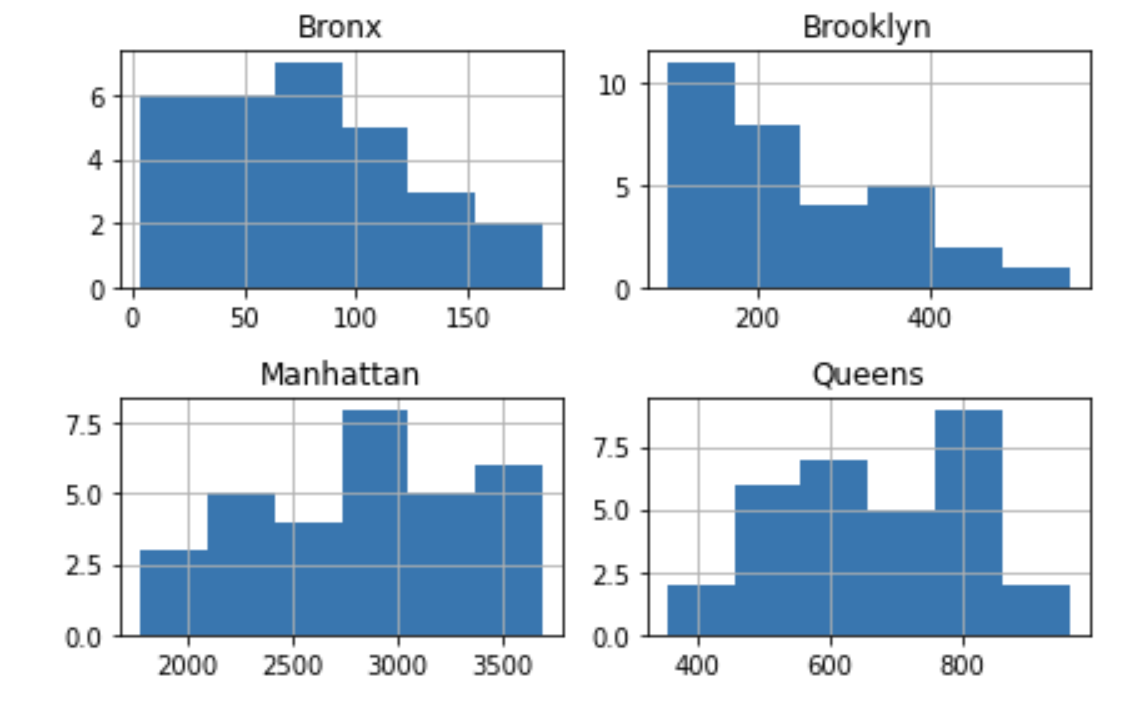

9.Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Припустимо, нам хочеться порівняти розподіли денних сум платежів по райнам. Давайте для цього виведемо 4 гістограми на одній фігурі. Вони звісно ж мають бути різного кольору і напівпрозорими для комфортного перегляду. Створіть гістограму максимально близьку до тої, що надана в очікуваному результаті.
`Підказка:` ця візуалізація створена з допомогою pandas plotting.

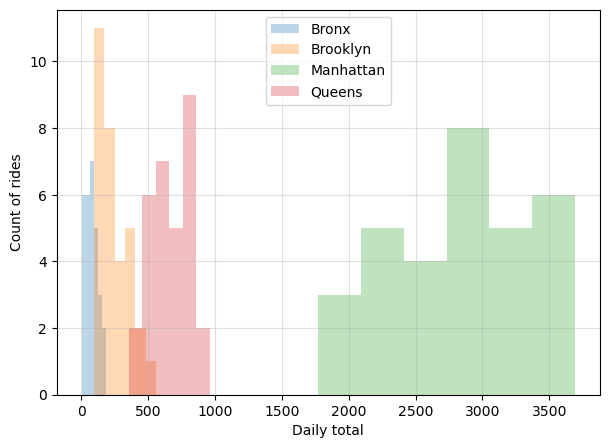

In [18]:
plt.figure(figsize=(7,5))
for col in borough_pivot.columns:
    plt.hist(borough_pivot[col], bins=6, alpha=0.3, label=col)
plt.xlabel('Daily total') 
plt.ylabel('Count of rides') 
plt.legend(loc='upper center')
plt.grid(axis='both', alpha=.4);
plt.show();

Очікуваний результат:

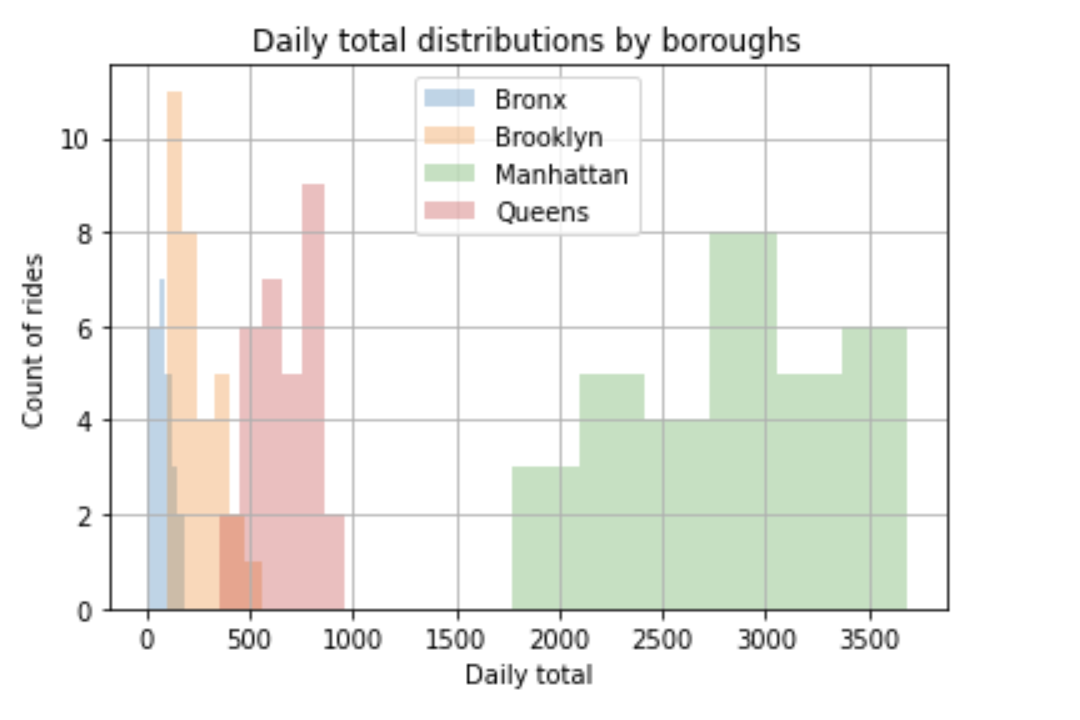

А ось приклад, як можна було сформувати щось подібне з допомогою функціоналу seaborn. Як на мене візуалізація за замовчанням не є зручною для розуміння.  

`Опціональне завдання`: Пограйтесь з налаштуваннями і пошукайте варіант, за якого візуалізація розподілу суми денних платежів через seaborn є на ваш погляд зручною для аналізу.

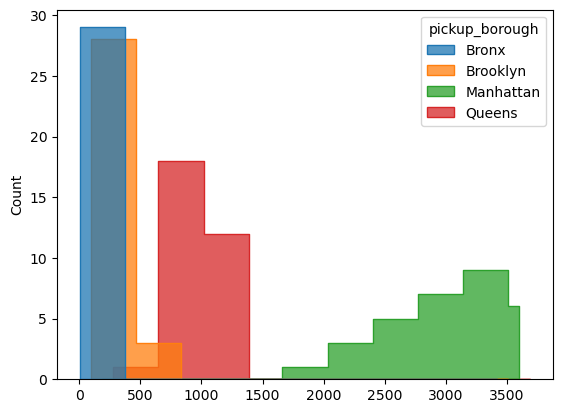

In [19]:
sns.histplot(data=borough_pivot, bins=10, element="step", multiple="dodge");

10.З допомогою seaborn виведіть гістограми суми щомісячних платежів по кольорам автомобілів (колонка `color`). На одній фігурі має бути кількість гістограм рівна кількості різних кольорів автомобілів в наборі даних. Встановіть розмір фігури (10,5) та знайдіть значення dots-per-inch для фігури за якого якість зображення буде хорошою (зображення не буде розмитим).
`Підказки:` 
1. побудувати візуалізацію можна в один рядок коду, і ще один рядок - для встановлення розмірів і роздільної здатності фігури. 
2. для зміни порядку відображення гістограм кольорів автомобілів (аби менша гістограма була перед, а не за більшою) можна посортувати датафрейм за полем кольору так, аби отримати той порядок, який вам потрібен. 

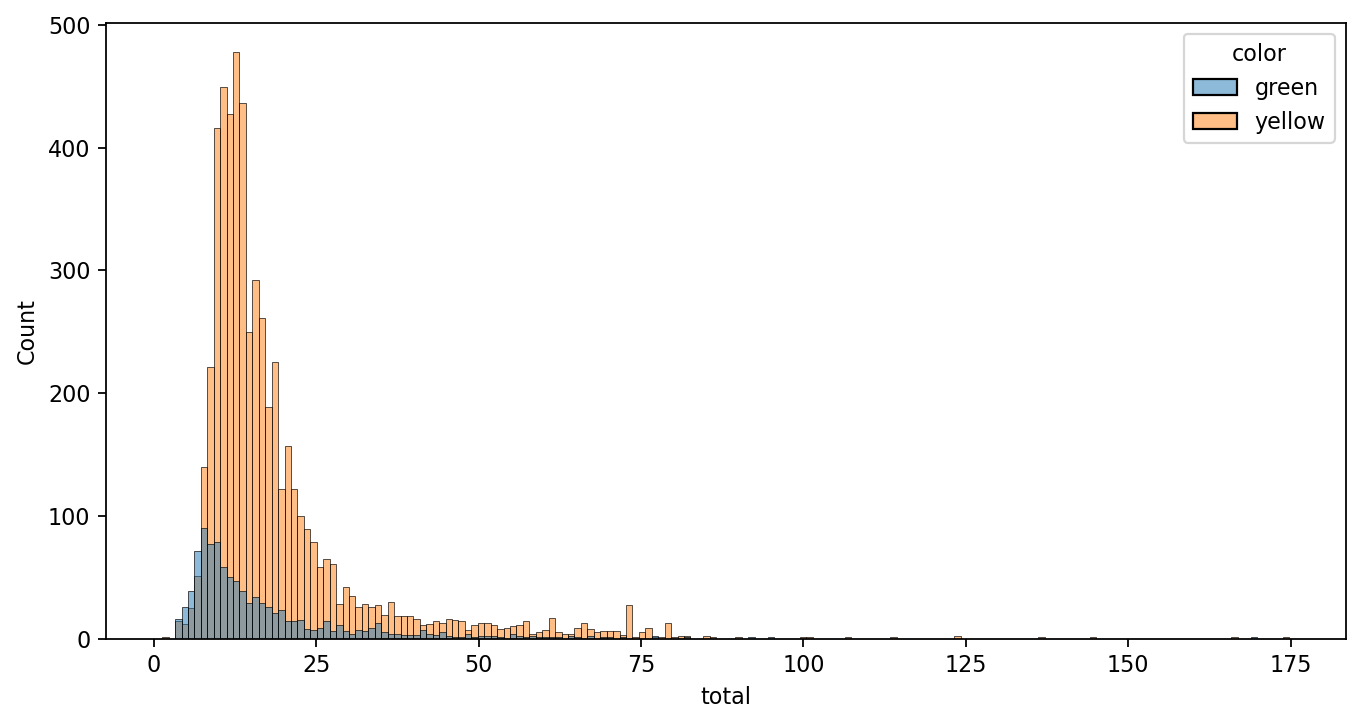

In [20]:
plt.figure(figsize=(10,5), dpi=160)
sns.histplot(data=df_taxi_clean, x="total", bins=175, hue="color", hue_order=["green", "yellow"]);

Очікуваний результат:

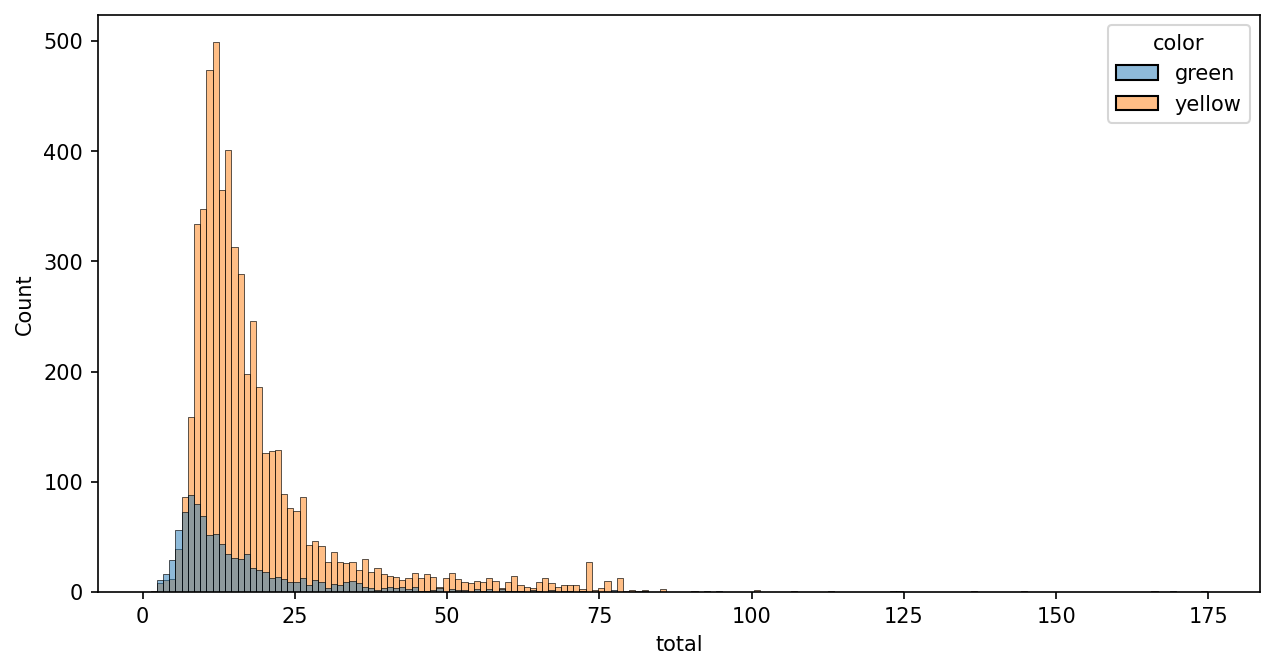

11.Цікаво, а чи є залежність між дальністю поїздки і розміром чайових? Побудуйте діаграму розсіювання між дальністю поїздки і розміром чайових. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

В очікуваному результаті я надаю графік, який би будувала я. На наведеному прикладі найскладніша частина - це зробити червоною цю лінію тренду (вона побудована з допомогою спеціального типу графіку в seaborn). Аби вказати колір лінії в тому типу графіку треба зазначити в параметрі `scatter_kws`, що ми хочемо лінію червоного кольору. Але якщо у вас не буде виходити лінія червоного кольору - нехай буде синього - це не критично :) 

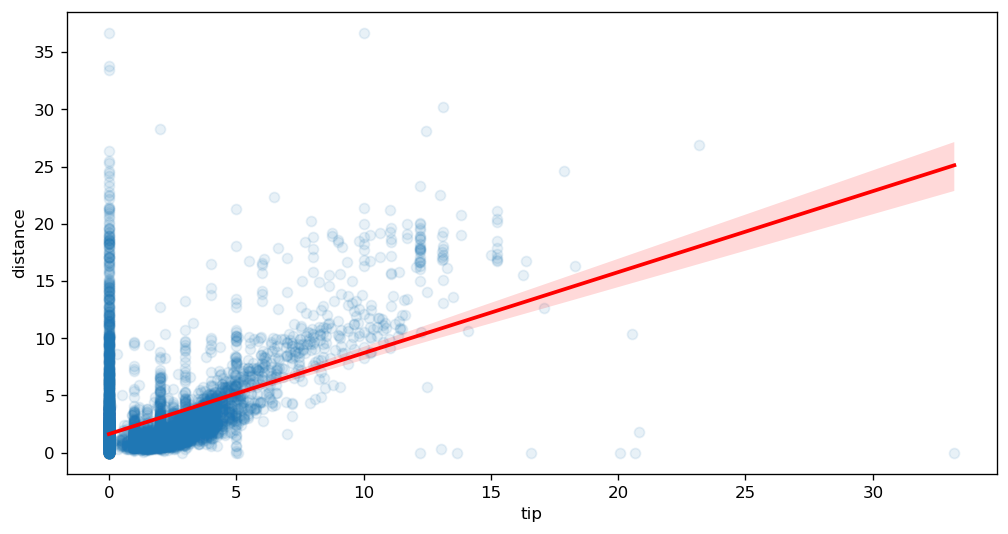

In [21]:
plt.figure(figsize=(10,5), dpi=120)
sns.regplot(data=df_taxi_clean, x="tip", y="distance", scatter_kws={'alpha': 0.1}, line_kws={'color': 'red'});

Один з можливих результатів (побудовано з seaborn):

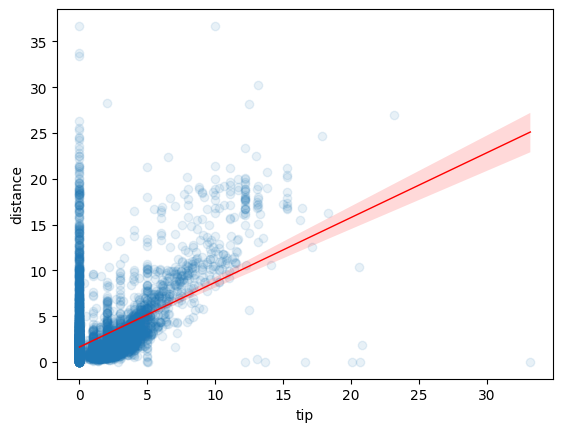

12.Дайте відповідь на питання: що означає пряма лінія з точок, паралельна осі, за якою розташована дальність поїздки?

In [22]:
f'Ця лінія показує, що поїздки будь-якої довжини залишаються без чайових. В подальшому, такі значення можливо вилучити і побудувати графік наново -> робити аналіз тільки по поїздкам з чайовими --> лінія регресії напевно що зміниться'

'Ця лінія показує, що поїздки будь-якої довжини залишаються без чайових. В подальшому, такі значення можливо вилучити і побудувати графік наново -> робити аналіз тільки по поїздкам з чайовими --> лінія регресії напевно що зміниться'

13.Побудуйте поденну динаміку чайових по районам, в яких забрали пасажира. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. Важливо, щоб на одному графіку було 4 лінії (всі райони, крім `NA`), які відображають динаміку чайових, була легенда і були підписи вісей. В очікуваному результаті я надаю графік, який би будувала я. 

Дайте відповіді на питання:
- при початку поїздки в якому районі **найрідше** дають чайові?
- а в поїздках з якого району **найчастіше** дають чайові? 
- при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)?

1) Найрідше дають чайові у Bronx
2) Найчастіше дають чайові у Queens
3) Найстабільніший розмір чайових у Manhattan


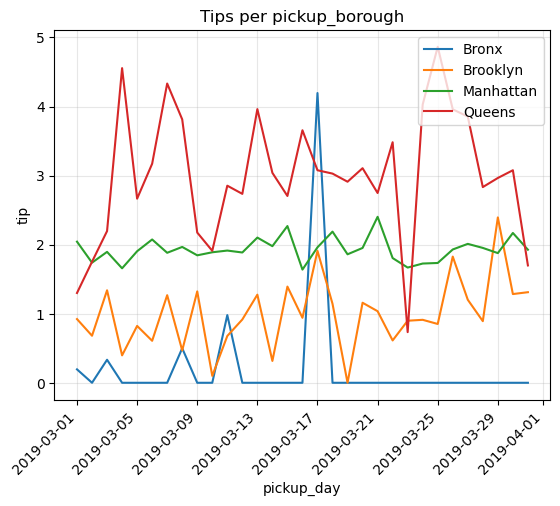

In [23]:
borough_tip_pivot = df_taxi_clean.pivot_table(index=['pickup_day'], columns=['pickup_borough'], values=['tip'])
borough_tip_pivot = borough_tip_pivot.tip.drop(columns='NA')

plt.title('Tips per pickup_borough')
plt.xlabel('pickup_day')
plt.xticks(rotation=45, ha='right')
plt.ylabel('tip')
plt.plot(borough_tip_pivot.fillna(0))
plt.legend(borough_tip_pivot, loc = 'upper right');
plt.grid(axis='both', alpha=.3);

print("1) Найрідше дають чайові у Bronx")
print("2) Найчастіше дають чайові у Queens")
print("3) Найстабільніший розмір чайових у Manhattan")

Один з можливих результатів (побудовано з seaborn):

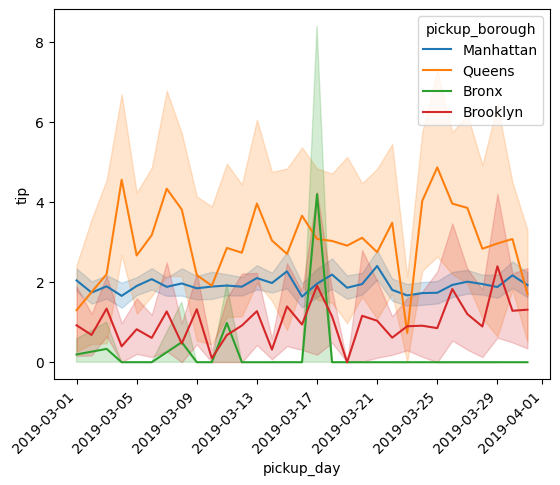

14.Побудуйте box-plot розміру чайових по району (всі райони, крім `NA`) старту поїздки. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

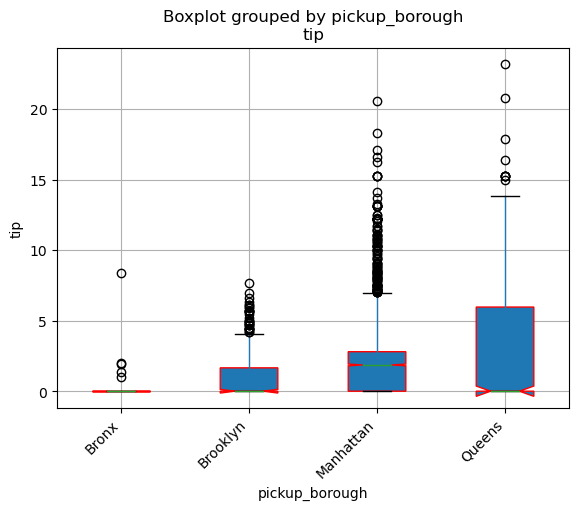

In [24]:
df_taxi_clean_3 = df_taxi_clean.drop(df_taxi_clean[df_taxi_clean.pickup_borough == 'NA'].index)
df_taxi_clean_3.boxplot(column = 'tip', by='pickup_borough', boxprops = {'color': 'red'}, notch=True, patch_artist=True);

plt.xticks(rotation=45, ha='right')
plt.ylabel('tip');

Один з можливих результатів (побудовано з seaborn):

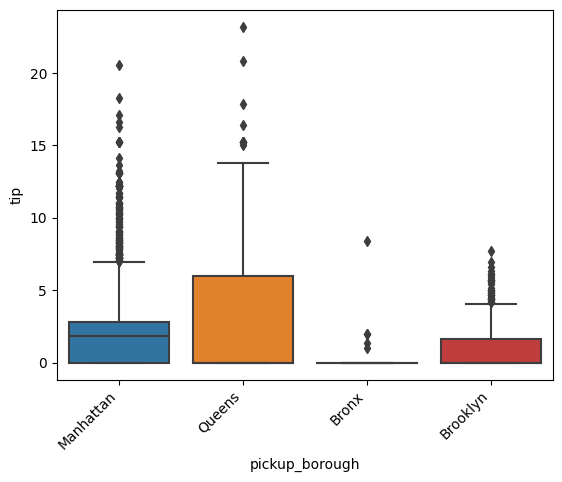

15.Творче завдання. Стовріть ТРИ інформативних візуалізації, які б допомогли в аналізі цих даних.   

Що вам було б цікаво дізнатись про ці поїздки? Як це можна було б використати при прийнятті рішень бізнесом? 
Наприклад, якщо найбільше поїздок в певний час доби, значить, треба стимулювати водіїв працювати в ці години. Якщо найбільше поїздок з певного району - треба тримати там запас авто, які б могли взяти пасажирів і т.д.
Не обмежуйте свою фантазію. 

Візуалізації мають бути не тими, на які ми вже побудували вище. Але можна створювати аналогічні, просто з використанням інших полів даних. І описати, що ви бачите з тих візуалізацій.
Кожна візуалізація оцінюється як 1 завдання. Без виконання цього завдання ДЗ не приймається. Якщо є питання щодо виконання - пишіть у чат.

Намагалися перевірити: чи різна кількість пасажирів на поїздку приносить різний дохід
Якби так - то можно було б спробувати провести промо-акцію(купони) для тих користувачів, у яких віртість поїздок висока, щоб вони активніше замовляли таксі тією ж кількістю пасажирів
Але результат такий, що різниці у вартості для різної кількості пасажирів - незначна, та виділито когось неможливо


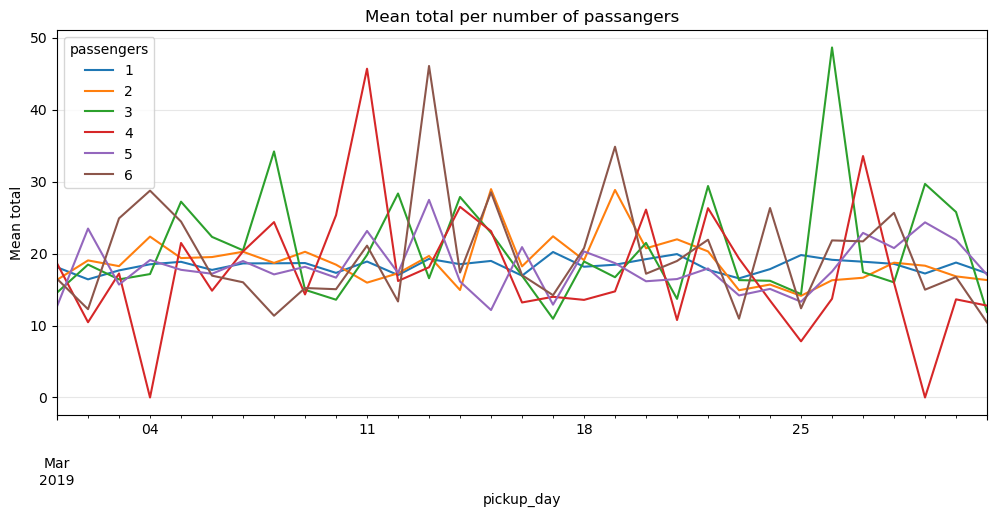

In [25]:
# Перевірка, чи різна кількість пасажирів на поїздку приносить різний дохід. Можливо варто стимулювати окрему категорію перевезень
passengers_total_pivot = df_taxi_clean.pivot_table(index=['pickup_day'], columns=['passengers'], values=['total'])
passengers_total_pivot = passengers_total_pivot.total.drop(columns=0)
passengers_total_pivot.fillna(0).plot(figsize=(12,5));
plt.grid(axis='both', alpha=.3)
plt.title('Mean total per number of passangers')
plt.xlabel('pickup_day')
plt.ylabel('Mean total');
print('Намагалися перевірити: чи різна кількість пасажирів на поїздку приносить різний дохід')
print('Якби так - то можно було б спробувати провести промо-акцію(купони) для тих користувачів, у яких віртість поїздок висока, щоб вони активніше замовляли таксі тією ж кількістю пасажирів')
print('Але результат такий, що різниці у вартості для різної кількості пасажирів - незначна, та виділито когось неможливо')

Намагалися перевірити: чи є залежність між типом оплати та вартістю поїздок
Отримали дві відповіді:
1) Для кредитної карти вартість поїздок вища, ніж для готівки. Варто (після додаткового аналізу вартості утримання такого користувача) замислитися над тим, щоб збільшити намагання розширювати користувачів даного типу. Бо напевно, при однакових витратах на кеш та кредитку - кеш приносить більше прибутку.
2) Різниця в залишених чайових між типом оплат. Для кешу - чайових не залишали. Для кредитних карток - так. Варто перевірити, чи дійсно, для кешу чайових не залишають, чи ця інформація не фіксується. Якщо не залишають, то напевно, аудиторія користувачів кредитних карток буде набагато більш лояльною для такого роду діяльності + можливо користувачам це зручніше робити ніж з кешем. Можливо вони роблять це через застосунок фірми таксі.


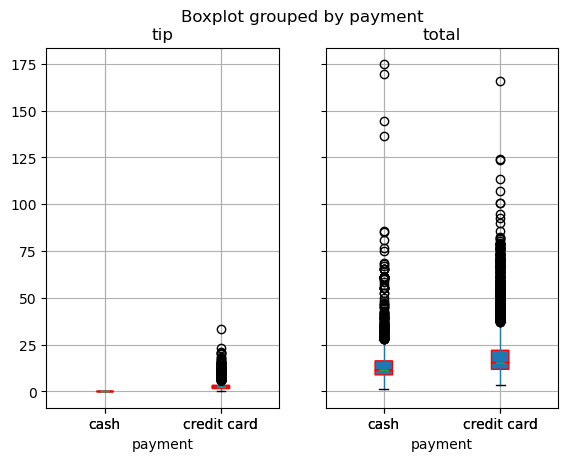

In [26]:
# чи є залежність між типом оплати та сумою поїздок
df_taxi_clean_payment_tip_total = df_taxi_clean.drop(df_taxi_clean[df_taxi_clean.payment == 'NA'].index)
df_taxi_clean_payment_tip_total.boxplot(column = ['tip','total'], by='payment', boxprops = {'color': 'red'}, notch=True, patch_artist=True);
print('Намагалися перевірити: чи є залежність між типом оплати та вартістю поїздок')
print('Отримали дві відповіді:')
print('1) Для кредитної карти вартість поїздок вища, ніж для готівки. Варто (після додаткового аналізу вартості утримання такого користувача) замислитися над тим, щоб збільшити намагання розширювати користувачів даного типу. Бо напевно, при однакових витратах на кеш та кредитку - кеш приносить більше прибутку.')
print('2) Різниця в залишених чайових між типом оплат. Для кешу - чайових не залишали. Для кредитних карток - так. Варто перевірити, чи дійсно, для кешу чайових не залишають, чи ця інформація не фіксується. Якщо не залишають, то напевно, аудиторія користувачів кредитних карток буде набагато більш лояльною для такого роду діяльності + можливо користувачам це зручніше робити ніж з кешем. Можливо вони роблять це через застосунок фірми таксі.')

Перевіряли: кореляцію між показниками passengers, distance, fare, tip, tolls, total + payment
Отримали цікаве наступне:
1) Тип оплати корелює тільки з чайовими.
2) Кількість пасажирів ні з чим не корелює. Що ми перевіряли до цього опосередковано.
3) Такі показники, як distance, fare, total - мають найбільшу кореляцію між собою, що є очевидним.
4) Такі показники, як tip, tolls - мають середнюу кореляцію.
Який можемо зробити висновок, та з чим далі працювати: 1) кількість пасажирів ні на що з розлянутих параметрів не впливає, потрібно шукати інші варіації залежності; 2) детальніше дослідити вплив типу оплати на чайові.


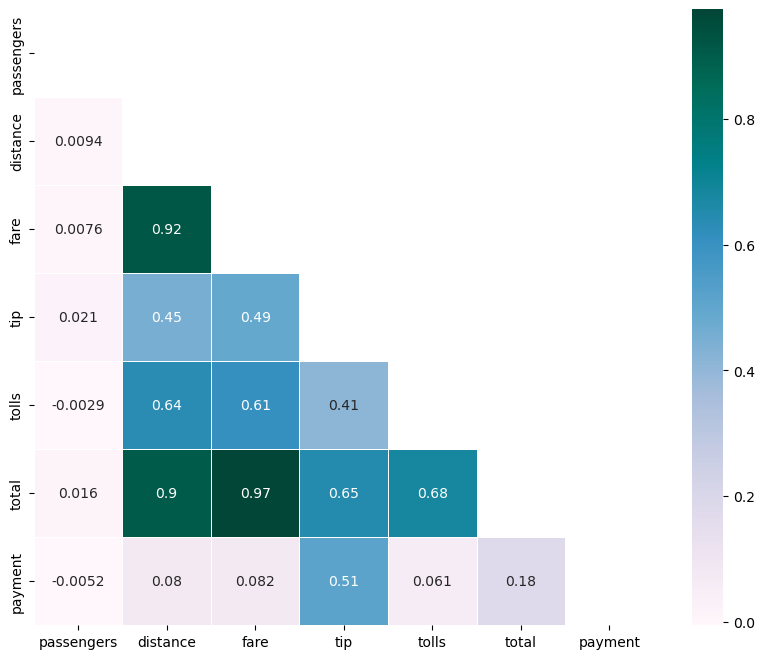

In [27]:
# переглянути кореляцію між показниками passengers, distance, fare, tip, tolls, total + payment
df_taxi_clean_corr_data = df_taxi_clean.drop(['pickup','dropoff','color', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough', 'pickup_day'], axis=1)
df_taxi_clean_corr_data['payment'] = df_taxi_clean_corr_data['payment'].map({'credit card': 1, 'cash': 0})
plt.figure(figsize=(10, 8))
matrix = np.triu(df_taxi_clean_corr_data.corr())
sns.heatmap(df_taxi_clean_corr_data.corr(), annot=True, linewidth=.7, mask=matrix, cmap="PuBuGn");
print('Перевіряли: кореляцію між показниками passengers, distance, fare, tip, tolls, total + payment')
print('Отримали цікаве наступне:')
print('1) Тип оплати корелює тільки з чайовими.')
print('2) Кількість пасажирів ні з чим не корелює. Що ми перевіряли до цього опосередковано.')
print('3) Такі показники, як distance, fare, total - мають найбільшу кореляцію між собою, що є очевидним.')
print('4) Такі показники, як tip, tolls - мають середнюу кореляцію.')
print('Який можемо зробити висновок, та з чим далі працювати: 1) кількість пасажирів ні на що з розлянутих параметрів не впливає, потрібно шукати інші варіації залежності; 2) детальніше дослідити вплив типу оплати на чайові.')